# Experiment 7 - Michelson Interferometer

### Date: 29/04/19 - 30/03/19
### Group Members: Aayushi Verma, Diana Kommedal, Alex Goodenbour

## Introduction

The Michelson interferometer has been used in a variety of disciplines, such as the ongoing LIGO experiment using interferometers with arms of several kilometres in length to successfully detect the presence of gravitational waves (disturbances in the curvature of spacetime due to accelerating masses). 

In this experiment we will demonstrate the use of a  Pasco Model OS-8501 Michelson interferometer to determine the wavelength of a He-Ne laser source of light. We will then use this laser source to determine the refractive index of air. Refractive index refers to a dimensionless number describing the relative speed of light through a given medium. 

## Method

### Configuration of the Michelson Interferometer

The Pasco Model OS-8501 used in this experiment consists of a laser source which is first spread out by 18mm focal length lens, and then split by a beam splitter into two orthogonal beams. One of the beams travels towards a fixed mirror denoted M1, while the other travels towards a movable mirror, M2. The beams are reflected by these mirrors and are recombined by the beam splitter, interfering to form a circular interference pattern on an adjacent viewing screen. The ability of the mirror M2 to move means that the path difference of the two beams can be changed before they are recombined. As the beam travels the distance from the beam splitter to M2 twice, going in and coming back, moving the mirror 1/2 a wavelength closer will result in a change in the path difference of 1 wavelength. The distance of the mirror M2 from the beam splitter can be adjusted using the micrometer knob.

Working with such small measurements of length, it is important that the equipment is aligned and secured properly before recording any data. First the interferometer was attached to a wooden base using screws built into the base of the interferometer. Next, the He-Ne laser used in this experiment was attached to the same wooden base using a frame that allowed micro-adjustments to be made to the position of the laser. This frame was held in place with magnets to the wooden base. To align the laser, the beam splitter was turned so that the incident laser light passed it and hit the movable mirror M2. The position of the laser was then adjusted so that the beam was reflected back onto the same vertical line as the aperture of the laser. The beam-splitter was then put back in place and adjusted to an angle of approximately 45$^{\circ}$. 

Two dots of light then appeared on the viewing screen. The angle of the beam splitter was then adjusted as to minimise the distance between these two dots, before its position was secured by screwing in the thumbscrew, tethering it to the interferometer base. The angle of the fixed mirror M1 was then adjusted using the alignment screws until the two dots were aligned on the viewing screen. It is important to ensure that these two beams are superimposed on the viewing screen as with anything more than a very small distance between them, an interference pattern will not occur. 

Once these dots were aligned, the 18mm focal length lens was put in place to spread the incident beam of laser light. An interference pattern of concentric circles was then visible on the viewing screen. 

### Wavelength of Laser Light

We first set out to determine the wavelength of He-Ne laser light to be used in determining the refractive index of air. We began with the assumption that the laser light emitted was in the visible light spectrum as this experiment relied on the ability to view an interference pattern.

The interferometer and He-Ne laser were then configured as in the above section. We then adjusted the micrometer knob so that the lever arm to which the movable mirror M2 is attached is parallel with the edge of the interferometer base. This must be done as the movement of the mirror M2 works by rotating around an axis, and so with sufficiently small angles, the distance moved towards the beam-splitter increases roughly linearly as the angle changes.

We then turned the micrometer knob one full turn counter-clockwise before continuing to turn it counter-clockwise until the index mark aligned with the 0 on the scale. This was done to combat mechanical backlash. Mechanical backlash is present in any mechanical system in which direction can be reversed. It occurs due to small gaps between parts. In this case, when reversing the direction of the micrometer knob, it may rotate a small distance before engaging the movement of the mirror M2. 

We then made a marking with black pen on the viewing screen between a dark and light fringe roughly 3 fringes from the centre of the interference pattern. We proceeded to turn the micrometer knob slowly counter-clockwise while counting the number of fringes that passed the mark on the viewing screen. Once 100 fringes had passed the mark, we recorded the distance moved by mirror M2 $d_m$, as indicated by the rotation of the micrometer knob. Each division on the micrometer knob corresponds to one micron (or $10^{-6} metres$). This process was repeated 3 times to find 3 values of the distance moved by mirror M2 for a change in fringes $\Delta M$ of 100. 

### Measuring the Index of Refraction of Air

The laser and interferometer configuration was first set up and aligned as in the previous sections. We then set up the vacuum chamber by attaching the air hose of the vacuum pump to the outlet hole of the vacuum chamber. The chamber was then attached to the interferometer base using the banana plug on the bottom of the chamber. The vacuum chamber was then oriented so that it is perpendicular to the incident beam of light. This is important as it minimises the refraction of light on entering a different medium. We can be sure that the effects of refraction are minimised because when the vacuum chamber is not perpendicular to the incident beam of light, secondary beams hit the viewing screen at unusual angles and by adjusting the orientation of the vacuum chamber we can minimise merge these beams in on the interference pattern. The adjustment screws for the fixed mirror M1 were then adjusted to ensure that this interference pattern appears on the viewing screen.

Before beginning to take measurements, we ensured that the vacuum chamber was at atmospheric pressure by flipping the vacuum release toggle switch on the PASCO Hand Vacuum Pump used in this experiment. As in the previous section, we marked the viewing screen with black pen between a light and dark fringe roughly 3 fringes from the centre to aid counting of passing fringes. The initial reading on the vacuum pump pressure gauge was recorded in inches of mercury (inHg). We then began to slowly pump air out of the vacuum chamber, counting the number of fringes that passed the marking on the viewing screen. When the change in pressure reached 20 inHg we recorded the number of fringes $\Delta m$ to pass the mark on the viewing screen as well as the change in pressure in the vacuum chamber $\Delta p_{gauge}$. This was repeated 5 times to obtain 5 values of the change in fringes $\Delta m$ for a change in pressure $\Delta p_{gauge}$ of 20 inHg.

## Analysis

In [1]:
# Setup and helper function definition

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

def round_to_1(x):
    return round(x, -int(np.floor(np.log10(abs(x)))))


in_to_cm = lambda x: 2.54*x


data = pds.read_csv("michelson.csv")

### Wavelength of Laser Light

In [2]:
# Takes d in microns. Returns wavelength given fringes passed and microns mirror has moved
lambda_ = lambda d,m: (2*d*10**(-6))/m
calculated_lambda = lambda_(data.d_m.mean(),data.del_m1.mean())

unc_m = 0.25 # uncertainty in m
unc_d = 0.5e-6 # Half a micron / uncertainty in d

# Uncertainty in wavelength calculated from propagation of uncertainty
lambda_unc = np.sqrt((4/data.del_m1.mean()**2)*unc_d**2+((4*data.d_m.mean()**(2*-6))/(data.del_m1.mean()**4))*unc_m**2) # Using propagation of uncertainties

print("Wavelength: ", calculated_lambda*10**(9), "±", round_to_1(lambda_unc)*10**(9), "nm")
#PoUnc

Wavelength:  630.0 ± 10.0 nm


### Measuring the Index of Refraction of Air

Mean Delta m (change in number of fringes):  16.8 ± 0.1
Slope:
 3.4878740157480313e-06
Slope unc:
 4.828921443330126e-08
n at 1 atm:  1.0002650784251967 ± 5e-08


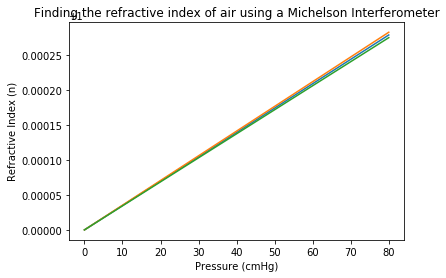

In [3]:
# Importing and processing the data

# Function to compute uncertainty due to variation in dataset
uncertainty_in_mean = lambda lst: (lst.std())/np.sqrt(len(lst))

p_absolute = 76.0-in_to_cm(data.p_gauge)

# Constants
lambda_0 = 632.8e-9
d = 3.0e-2

print("Mean Delta m (change in number of fringes): ", data.del_m.mean(), "±", round_to_1(uncertainty_in_mean(data.del_m)))

#Function returning the slope given the values of m and the initial value of the wavelength
find_slope = lambda m, lambda_i, p: ((m.mean()*lambda_i)/(2*d))/(p)

slope = find_slope(data.del_m, lambda_0, in_to_cm(20))

unc_p = in_to_cm(0.25) # Uncertainty in pressure from hand pump gauge divisions

# uncertainty using propagation of uncertainties
slope_unc = np.sqrt(((lambda_0**2)*(0.1**2))/(4*(d**2)*(in_to_cm(20)**2))+((data.del_m.mean()**2)*(lambda_0**2)*(unc_p**2))/(4*(d**2)*(in_to_cm(20)**4)))

#PoUnc

print("Slope:\n", slope)

print("Slope unc:\n", slope_unc)

lin_relationship = lambda x: slope*x + 1

# Plotting line given slope
x = np.linspace(0, 80, 1000)
plt.plot(x, lin_relationship(x))

#Plots for bounds on slope uncertainty
plt.plot(x, (slope+slope_unc)*x+1)
plt.plot(x, (slope-slope_unc)*x+1)

# Formatting of graph
plt.title("Finding the refractive index of air using a Michelson Interferometer")
plt.ylabel("Refractive Index (n)")
plt.xlabel("Pressure (cmHg)")

# Finding ref. index at 1atm (or 76 Hg cm)
print("n at 1 atm: ", lin_relationship(76), "±", round_to_1(lin_relationship(76)*slope_unc))

## Discussion

In the first part of the experiment, we set out to measure the wavelength of He-Ne laser light. The value obtained was $630.0 \pm 10.0 nm$. This is well within the range we would expect from He-Ne emission, and upon comparing this value with the established literature value of 632.8 nm, we find that this value falls well within the range of our calculated value. 

In the second part of this experiment, we obtained a value of $1.00026508 \pm (5x10^{-8})$ for the refractive index of air. Upon first inspection, this is within the range we would expect. Upon comparison with the published value of 1.00293, we find that our obtained set of values does not contain this published value. The refractive index of air depends on several factors, such as pressure and temperature. It may well be the case that our obtained value is completely valid. However, The uncertainty attached to our obtained value is very small which indicates that the individual uncertainties which made up the uncertainty in this value do not fully account for the variation in refractive index. Upon repeating this experiment, we would take several trials for a given pressure delta so that we could obtain the uncertainty in our mean due to random variation. This would likely give us a more realistic bound on our obtained value. 

In carrying out an experiment to obtain wavelengths that vary only in the range on 10 nm, precision of equipment is of the utmost importance. Therefore, if we were to repeat the experiment, we would likely use different equipment as limitations of the equipment used made keeping the required precision extremely difficult. This may well have introduced unaccounted for uncertainties into our final results. One example of equipment difficulty was the positioning of the laser. The laser itself was kept inside a frame which was then attached to the wooden base of the experiment with magnets. These magnets made it quite difficult to carry out the initial positioning of the laser due to its tendency to snap to certain positions. As well as this, the fine tuning of the positioning of the laser was done using 2 sets of 3 screws holding the laser in place in its base. To alter the laser's position, one had to work with several screws at once and it became very easy to knock the laser out of alignment if too much force was used. As the interferometer configuration was built into a base, the alignment of the interferometer did not lead to the same issues as the alignment of the laser. 

To obtain a value for the refractive index of air, we started with the axiom that the refractive index of air with 0 pressure (i.e. a vacuum) was 1. We then used an expression for the slope of the graph of refractive index vs. pressure to construct a linear relationship between these two variables with the uncertainty in the slope propagating to the uncertainties in the readings from this linear relationship. However, this is essentially using two data points to construct a relationship between two variables which should lead to a far greater uncertainty than our obtained uncertainty. Upon repeating this experiment, we would no doubt carry out the experiment in a way that allowed us to collect data points for pressures of a known refractive index to calculate a more precise linear relationship between these two variables.

Two main approximations were used in this experiment to greatly simplify the math involved in the calculation of our final results. The first of which is the small angle approximation used in the changing of the distance of the mirror M2 from the beam-splitter. This distance is changed by rotating the lever arm to which M2 is attached about an axis on the side of the interferometer base. As the lever arm's initial position is parallel to the interferometer base, for very small angles, such as those used in this experiment, the movement is approximately linear. However, it is important to note that there will be a slight variation introduced due to this approximation. This could be remedied by using the non-linear expression for the motion of the lever arm in calculating the wavelength of He-Ne laser light, or simply by changing the mechanism by which the lever arm moves to a purely linear one.  

## Conclusion

The aim of this investigation was to first determine the wavelength of light emitted by an He-Ne laser using a Michelson interferometer and then to determine the index of refraction of air at lab pressure by constructing a linear relationship between index of refraction and air pressure. We found the wavelength of light emitted by an He-Ne laser to be $630.0 \pm 10.0 nm$. The literature value for this wavelength was well within these bounds. For the refractive index of air, we obtained a value of $1.00026508 \pm 5x10^{-8}$. The literature value for this calculation was not within our range of uncertainty, however, refractive index is dependent on several factors which can vary quite widely and therefore our obtained value may well be precise for our given situation. Upon repeating this experiment, there are several aspects that would likely be altered. We would use a different system to fine-tune the positioning of the laser to reduce the uncertainty due to imprecise set-up, and to reduce the time spent positioning the laser. To obtain a more realistic uncertainty on our calculated index of refraction of air, we would take at least 10 trials to calculate the uncertainty due to random variation.

The techniques demonstrated in this experiment have a wide range of possible uses throughout the field of optics. The basic principle of splitting one beam into two and altering the speed or distance travelled by that beam before recombining the two beams to give an interference pattern allows for such an in depth examination of the properties of light and other physical phenomena that it revolutionised our understanding of light after its first publicised use in the Michelson-Morley experiment. In particular, the ability to calculate the wavelength of a given source to within such a high degree of accuracy has repercussions especially in astronomy. The basic principle demonstrated in this experiment can be extended to an optical spectrum of non-chromatic sources using the Fourier transform, allowing this technique to be used in spectroscopy. We can therefore, use the basic principles pioneered by Albert A. Michelson and Edward W. Morley to determine the chemical composition of distant stars or even the rate at which the universe is expanding. 